<a href="https://colab.research.google.com/github/caiocesarcosta/marchine_learning/blob/main/rede_neural_exemplo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from  torchvision import datasets, transforms
from torch import nn, optim







In [ ]:
# Define the transformation to convert images to tensors
transform = transforms.ToTensor()

# Load the training dataset
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Load the validation dataset
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)



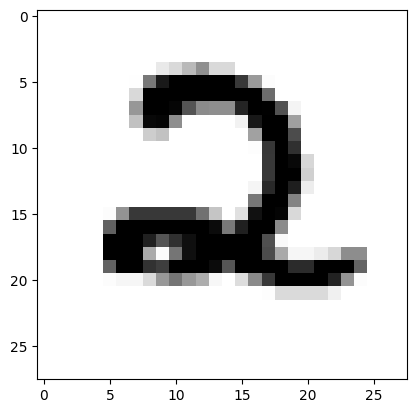

In [ ]:
# Create an iterator for the trainloader
dataiter = iter(trainloader)

# Get a batch of images and labels
#imagens, etiquetas = dataiter.next()

for imagens, etiquetas in dataiter:
    plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')
    plt.show()
    break  # Adicione um break para mostrar apenas uma imagem

# Display the first image in the batch
#plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')
#plt.show()

In [ ]:
print(imagens[0].shape) #para verificar as dimensões de cada imagem
print(etiquetas[0].shape) # para verificar as dimensões de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28 * 28, 128)  # Input layer (784 neurons -> 128)
        self.linear2 = nn.Linear(128, 64)      # Hidden layer 1 (128 neurons -> 64)
        self.linear3 = nn.Linear(64, 10)       # Output layer (64 neurons -> 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))  # ReLU activation after the first linear layer.
        x = F.relu(self.linear2(x))  # ReLU activation after the second linear layer.
        x = self.linear3(x)          # No activation function in the output layer for log_softmax.
        return F.log_softmax(x, dim=1) # Log-softmax for multi-class classification.

In [ ]:
def treino(modelo, trainloader, device):
    optimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)  # SGD optimizer
    inicio = time.time()                                                # Start time
    criterio = nn.NLLLoss()                                             # Negative Log Likelihood Loss
    EPOCHS = 10                                                        # Number of epochs

    modelo.to(device)  # Move the model to the specified device (CPU or GPU)
    modelo.train()     # Set the model to training mode

    for epoch in range(EPOCHS):
        perda_acumulada = 0
        for imagens, etiquetas in trainloader:
            imagens = imagens.view(imagens.shape[0], -1).to(device) # Flatten images and move to device
            optimizador.zero_grad()                             # Zero out gradients
            output = modelo(imagens)                               # Forward pass
            perda_instantânea = criterio(output, etiquetas.to(device)) # Calculate loss
            perda_instantânea.backward()                           # Backpropagation
            optimizador.step()                                    # Update weights
            perda_acumulada += perda_instantanea.item() # atualização da perda acumulada


In [ ]:
def validacao(modelo, valloader, device):
    conta_corretas = 0
    conta_todas = 0
    modelo.to(device)
    modelo.eval() # Set model to evaluation mode

    with torch.no_grad(): # Deactivate autograd for faster evaluation
        for imagens, etiquetas in valloader:
            img = imagens.view(imagens.shape[0], -1).to(device) # Flatten images and move to device

            logps = modelo(img) # Model output (log probabilities)
            ps = torch.exp(logps) # Convert to probabilities

            probabilidades = list(ps.cpu().numpy()) # Move to CPU and convert to NumPy array

            # Get predicted class (index with the highest probability)
            etiquetas_pred = [probabilidade.argmax() for probabilidade in probabilidades]


            # Convert labels to NumPy array for comparison (needed if the input is a PyTorch tensor)
            etiquetas_certas = etiquetas.cpu().numpy()

            for etiqueta_certa, etiqueta_pred in zip(etiquetas_certas, etiquetas_pred):
                if etiqueta_certa == etiqueta_pred:
                    conta_corretas += 1
                conta_todas += 1


    print(f"Total de imagens testadas: {conta_todas}")
    print(f"Precisão do modelo: {conta_corretas*100/conta_todas:.2f}%")

In [ ]:
# Assuming 'Modelo' is defined from a previous code snippet
modelo = Modelo()

# Determine device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)